In [45]:
import numpy as np
from astropy.io import fits

import matplotlib.pyplot as plt
plt.rcParams['image.origin']='lower'

import matplotlib
from matplotlib.colors import LogNorm, Normalize
from matplotlib.patches import Circle
from matplotlib.animation import FFMpegWriter, PillowWriter
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.rcParams['animation.html'] = 'html5'
plt.rcParams.update({'image.origin': 'lower',
                     'image.interpolation':'nearest'})

from scoobi.imshows import imshow1, imshow2, imshow3


In [66]:
def create_anim(data1, data2, 
                cmap1='viridis', cmap2='magma',
                norm1=None, norm2=None,
                extent1=None, extent2=None,
                interval=500, # in ms
                ):
    numframes = data1.shape[0]
    print(numframes)

    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5),dpi=125)
    fig.suptitle(f'Iteration {0:d}', fontsize=18)
    
    im1 = ax[0].imshow(data1[0], norm=norm1, cmap=cmap1, extent=extent1)
    im1_title = ax[0].set_title(f'Total DM Command', fontsize=14)
    divider = make_axes_locatable(ax[0])
    cax1 = divider.append_axes("right", size="4%", pad=0.075)
    cbar1 = fig.colorbar(im1, cax=cax1)

    im2 = ax[1].imshow(data2[0], norm=norm2, cmap=cmap2, extent=extent2)
    mean_ni = np.mean(data2[0][control_mask_1])
    im2_title = ax[1].set_title(f'Normalized Image:\nMean NI = {mean_ni:.2e}', fontsize=14)
    divider = make_axes_locatable(ax[1])
    cax2 = divider.append_axes("right", size="4%", pad=0.075)
    cbar2 = fig.colorbar(im2, cax=cax2)
    # ax[1].set_xticks([])
    # ax[1].set_yticks([])
    ax[1].add_patch(Circle((0,0), 2.5, fill=False, color='lime'))
    ax[1].add_patch(Circle((0,0), 12, fill=False, color='lime'))
    ax[1].add_patch(Circle((0,0), 3, fill=False, color='cyan'))
    ax[1].add_patch(Circle((0,0), 10, fill=False, color='cyan'))

    fig.subplots_adjust(wspace=0.25)
    def animate(i):
        fig.suptitle(f'Iteration {i:d}', fontsize=20)

        im1.set_data(data1[i])
        im1_title.set_text(f'Total DM Command')
        # im1.set_clim(vmin=, vmax=np.max(data1[i]))

        im2_arr = data2[i]
        mean_ni = np.mean(im2_arr[control_mask_1]) if i<15 else np.mean(im2_arr[control_mask_2])
        im2.set_data(im2_arr)
        im2_title.set_text(f'Normalized Image:\nMean NI = {mean_ni:.2e}')

    anim = matplotlib.animation.FuncAnimation(fig, animate, frames=numframes, interval=interval)
    return anim

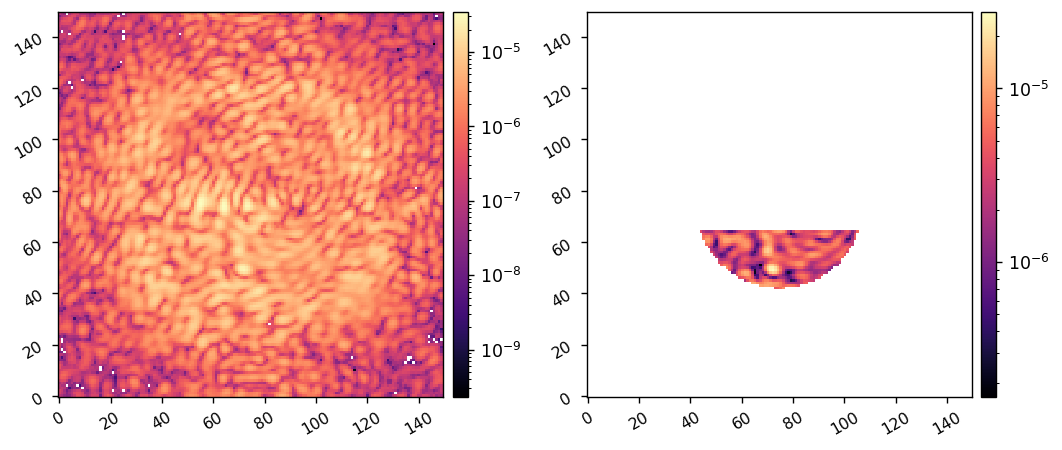

4.515018359283198e-06

In [60]:
i = 0
imshow2(all_ims[i], all_ims[i]*control_mask_2, lognorm=True)
np.mean(all_ims[i][control_mask_2])

In [63]:
date = 20240809
ref_im = fits.getdata(f'../data/{date}_ref_coro_im.fits')
ims = fits.getdata(f'../data/{date}_iefc_hadamard_ims.fits')
commands = fits.getdata(f'../data/{date}_iefc_hadamard_commands.fits')
control_mask_1 = fits.getdata(f'../data/{date}_iefc_control_mask_1.fits').astype(bool)
control_mask_2 = fits.getdata(f'../data/{date}_iefc_control_mask_2.fits').astype(bool)

all_ims = np.insert(ims, 0, ref_im, axis=0)
all_commands = np.insert(commands, 0, np.zeros((34,34)), axis=0)
print(all_ims.shape, all_commands.shape)


(31, 150, 150) (31, 34, 34)


In [58]:
im_pxscl = 0.307
npsf = all_ims[0].shape[0]
im_lim = im_pxscl * npsf/2 
im_extent = [-im_lim, im_lim, -im_lim, im_lim]

(31, 150, 150) (31, 34, 34)
31


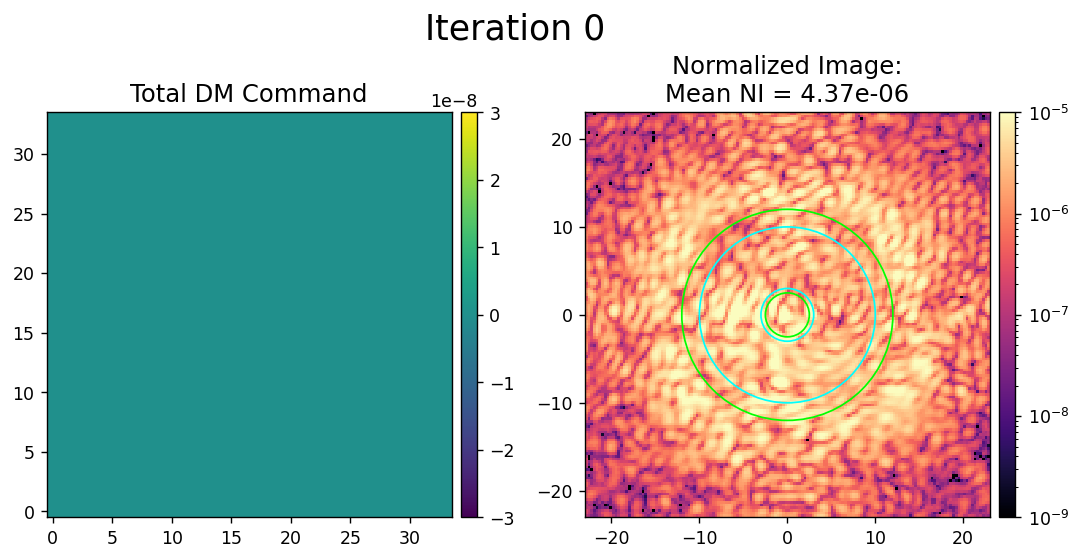

In [67]:
all_ims = np.insert(ims, 0, ref_im, axis=0)
all_commands = np.insert(commands, 0, np.zeros((34,34)), axis=0)
print(all_ims.shape, all_commands.shape)

norm1 = Normalize(vmin=-30e-9, vmax=30e-9)
norm2 = LogNorm(vmin=1e-9, vmax=1e-5, clip=True)

create_anim(all_commands, all_ims, norm1=norm1, norm2=norm2, extent2=im_extent, interval=500)